<a href="https://colab.research.google.com/github/bhavanakesineni/AI-ML-TASKS/blob/main/TASK10_WEATHERAUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries:


what is Logistic Regression?

Logistic Regression is a statistical method used for binary classification tasks, where the target variable has two possible outcomes. Despite its name, it is actually a classification algorithm rather than a regression algorithm.

In Logistic Regression, the goal is to model the probability that a given input belongs to a particular category. It predicts the probability of occurrence of an event by fitting data to a logistic curve. The logistic curve, also known as the sigmoid function, is an S-shaped curve that maps any real-valued number into a value between 0 and 1.


The logistic function is represented as:

P(Y=1∣X)= 1\(1+e −(β0+β1X))​

 Where:

P(Y=1∣X)  is the probability of the dependent variable (Y) being 1 given the independent variable (X).

e is the base of the natural logarithm.

β0 and β1 are the parameters of the model to be estimated.

X represents the independent variable(s)


Logistic Regression is widely used due to its simplicity, interpretability, and efficiency in binary classification tasks

In [ ]:
## importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Load the dataset:


In [ ]:
data = pd.read_csv('/content/weatherAUS.csv.zip')


Perform Exploratory Data Analysis (EDA):


         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

<ipython-input-3-13ece47e0e72>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())


                MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.749687  0.110800     0.506764  0.076087   
MaxTemp        0.749687  1.000000 -0.069981     0.650964  0.463913   
Rainfall       0.110800 -0.069981  1.000000    -0.077239 -0.246379   
Evaporation    0.506764  0.650964 -0.077239     1.000000  0.369250   
Sunshine       0.076087  0.463913 -0.246379     0.369250  1.000000   
WindGustSpeed  0.118054  0.035531  0.106308     0.209566 -0.052422   
WindSpeed9am   0.108522 -0.008171  0.050584     0.193154 -0.013842   
WindSpeed3pm   0.137273  0.012266  0.044112     0.124345  0.029200   
Humidity9am   -0.174991 -0.495781  0.263625    -0.554232 -0.500343   
Humidity3pm    0.070827 -0.448116  0.277625    -0.422436 -0.629299   
Pressure9am   -0.475661 -0.350980 -0.180606    -0.297319  0.043330   
Pressure3pm   -0.495577 -0.451691 -0.137302    -0.325954 -0.020632   
Cloud9am       0.106177 -0.263634  0.217169    -0.199809 -0.677939   
Cloud3pm       0.042

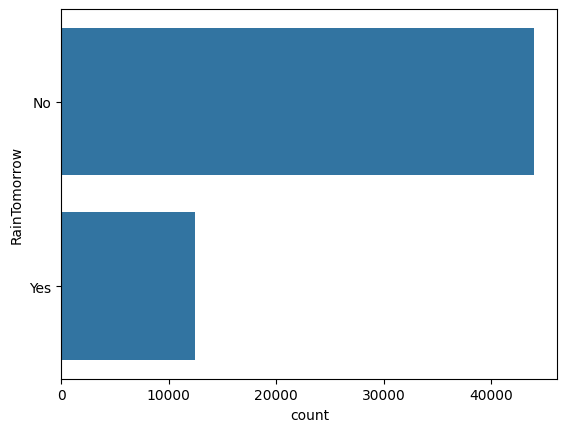

In [ ]:
# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values
data.dropna(inplace=True)

# Summary statistics
print(data.describe())

# Correlation matrix
print(data.corr())

# Visualize data using seaborn
sns.countplot(data['RainTomorrow'])
plt.show()


Data Preprocessing:


In [ ]:
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Split the data into features and target variable
X = data.drop('RainTomorrow_Yes', axis=1)
y = data['RainTomorrow_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Training

In [ ]:
# Initialize Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation:


In [ ]:
# Predictions on the testing data
y_pred = model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8520914569301666
Confusion Matrix:
[[8315  484]
 [1185 1300]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      8799
           1       0.73      0.52      0.61      2485

    accuracy                           0.85     11284
   macro avg       0.80      0.73      0.76     11284
weighted avg       0.84      0.85      0.84     11284



<ipython-input-6-380fc35fad8a>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


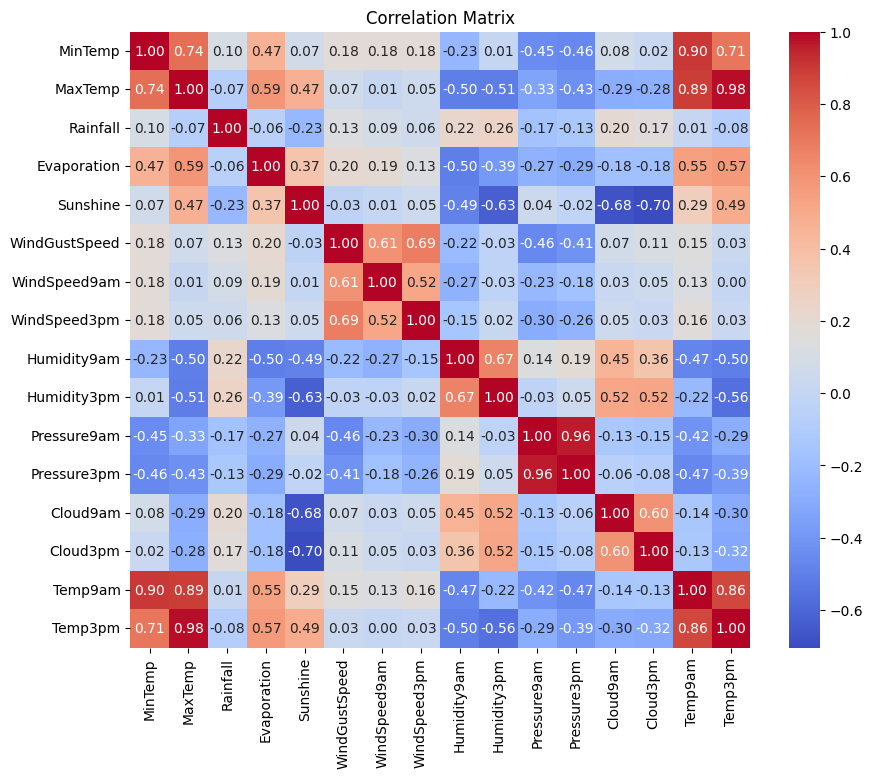

In [ ]:
# Plot the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
data = pd.read_csv('/content/weatherAUS.csv.zip')

#import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


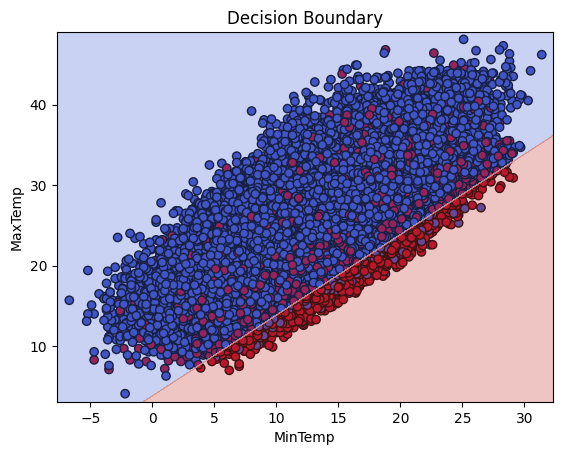

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


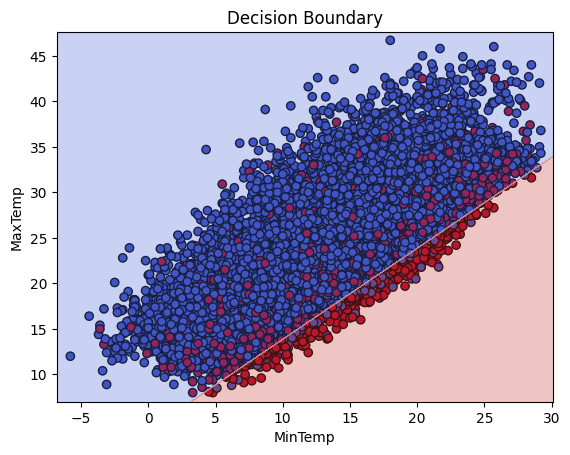

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but LogisticRegression is expecting 3502 features as input.

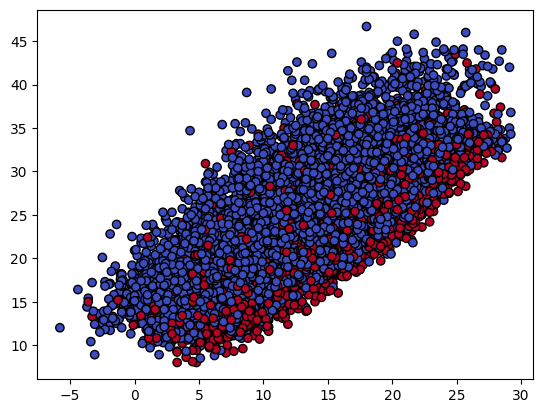

In [ ]:
# Selecting only two features for visualization
X_train_subset = X_train.iloc[:, :2]
X_test_subset = X_test.iloc[:, :2]

# Initialize Logistic Regression model
model_subset = LogisticRegression()

# Fit the model on the training data with two features
model_subset.fit(X_train_subset, y_train)



# Assuming X_train has only two features for visualization
X_train_subset = X_train.iloc[:, :2]

# Initialize Logistic Regression model
model_subset = LogisticRegression()

# Fit the model on the training data with two features
model_subset.fit(X_train_subset, y_train)

# Plotting the decision boundary
plot_decision_boundary(model_subset, X_train_subset, y_train)

# Plotting the decision boundary
plot_decision_boundary(model_subset, X_test_subset, y_test)


import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    # Plot data points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='coolwarm', edgecolors='k')

    # Plot decision boundary
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.title('Decision Boundary')
    plt.show()

# Assuming X_test has only two features for visualization
plot_decision_boundary(model, X_test.iloc[:, :2], y_test)
